In [1]:

import PKoopmanDL as pkdl
import numpy as np
import matplotlib.pyplot as plt
import torch

# config_file = "vdpm-edmd.json"
# config_file = "vdpm-edmddl.json"
config_file = "vdpm-paramkoopman.json"
nontrain_func = lambda x: torch.cat([torch.ones((x.shape[0], 1)), x], dim=1)
# solver = pkdl.EDMDRBFSolverWrapper(config_file)
# solver = pkdl.EDMDDLSolverWrapper(config_file)
solver = pkdl.ParamKoopmanDLSolverWrapper(config_file)
solver.setup(nontrain_func)
K = solver.solve()

CUDA is available. GPU is being used.


2024-11-08 20:21:05,547 PKoopmanDL: [INFO] [ParamKoopmanDLSolver] Solving...
Training: 100%|██████████| 100/100 [02:44<00:00,  1.65s/it, train_loss=1.03e-03]


## Plot

Text(0, 0.5, '$x_{2}$')

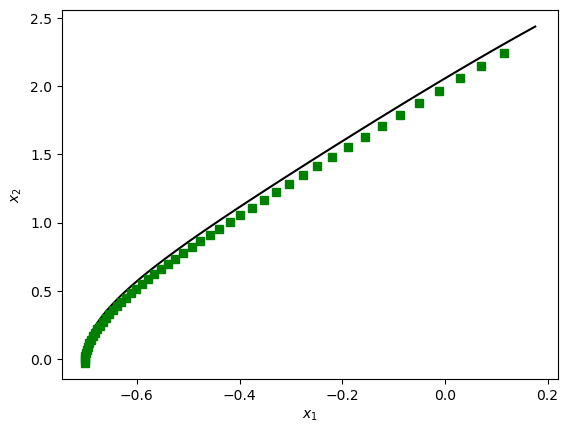

In [3]:
# predict
param = torch.tensor([[0.0, 0.5]]).detach()
dataset_predict = pkdl.ODEDataSet(solver.ode, solver.flowmap)
dataset_predict.generate_data(1, solver.traj_len, solver.x_min, solver.x_max, param)
x0 = torch.unsqueeze(dataset_predict.data_x[0], dim=0)
p = K.predict(param, x0, solver.dictionary, [1,2], solver.dim_nontrain, solver.traj_len).detach()
# p = K.predict(x0, solver.dictionary, [1,2], solver.dim_nontrain, solver.traj_len).detach()
x_est_traj = p[0, :, :]

x_traj = solver.flowmap.generate_traj_data(solver.ode, x0, param, solver.traj_len).detach()
plt.plot(x_traj[:,0], x_traj[:,1], 'k-', label='Exact', markevery=2)
plt.plot(x_est_traj[:,1], x_est_traj[:,2], 'gs', label='ParamKoopman', markevery=2)

plt.xlabel(r"$x_{1}$")
plt.ylabel(r"$x_{2}$")
# plt.legend(loc='best',prop={'size':14})